<a href="https://colab.research.google.com/github/seyong2/spaceship-titanic/blob/main/Spaceship_Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we will be exploring the *Spaceship Titanic* dataset before building a model to **predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly**.

The dataset can be found [here](https://www.kaggle.com/competitions/spaceship-titanic/data).

# 0. Import Python packages

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import KNNImputer

# 1. Load Data

Let's load the training data in folder *data* and start exploring.

In [2]:
# Install the Kaggle library
! pip install kaggle

# Make a directory named ".kaggle"
! mkdir ~/.kaggle

# Copy the "kaggle.json" into this new directory
! cp kaggle.json ~/.kaggle/

# Allocate the required permission for this file
! chmod 600 ~/.kaggle/kaggle.json

! kaggle competitions download spaceship-titanic

! unzip spaceship-titanic.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 91.2MB/s]
Archive:  spaceship-titanic.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
train_df = pd.read_csv("train.csv")

In [4]:
print(f"The training dataset has {train_df.shape[0]} rows and {train_df.shape[1]} columns.")

The training dataset has 8693 rows and 14 columns.


In [5]:
print(f"The first five rows of the training dataset:\n")
train_df.head()

The first five rows of the training dataset:



,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
print(f"The last five rows of the training dataset:\n")
train_df.tail()

The last five rows of the training dataset:



,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


**Data description**

* `PassengerId`: A unique Id for each passenger. Each Id takes the form `gggg_pp` where `gggg` indicates a group the passenger is travelling with and `pp` is their number within the group. People in a group are often family members, but not always.
* `HomePlanet`: The planet the passenger departed from, typically their planet of permanent residence.
* `CryoSleep`: Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* `Cabin`: The cabin number where the passenger is staying. Takes the form `deck/num/side`, where `side` can be either `P` for Port or `S` for Starboard.
* `Destination`: The planet the passenger will be debarking to.
* `Age`: The age of the passenger.
* `VIP`: Whether the passenger has paid for special VIP service during the voyage.
* `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`: Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* `Name` - The first and last names of the passenger.
* `Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

Below a concise summary of the training data is given.

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Based on the summary, the features are one of three types; continuous, categorical, and ambiguous.

* Continuous: `Age`, `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, and `VRDeck`.
* Categorical: `HomePlanet`, `CryoSleep`, `Destination`, `VIP`, and `Transported`.
* Ambiguous: `PassengerId`, `Cabin`, and `Name`.

# 2. Data Exploration - Univariate

Now the columns are broken down into three separate buckets, let's examine each one individually.

In [8]:
num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

uni_stats = train_df.describe()
uni_stats.loc['skew'] = train_df.loc[:, num_cols].skew().tolist()
uni_stats.loc['kurt'] = train_df.loc[:, num_cols].kurtosis().tolist()

uni_stats

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000
skew,0.419097,6.333014,7.102228,12.627562,7.636020,7.819732
kurt,0.101933,65.273802,73.307230,328.870913,81.202110,86.011186


According to descriptive statistics of the numerical features...
* no obvious inconsistencies are captured.
* all the continuous features except `Age` are right-skewed.
* `Age` feature has fat tails whereas the remaining features have very thin tails.
* all of them contain missing observations.


Let's have a look at how they are distributed.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<Figure size 864x432 with 0 Axes>

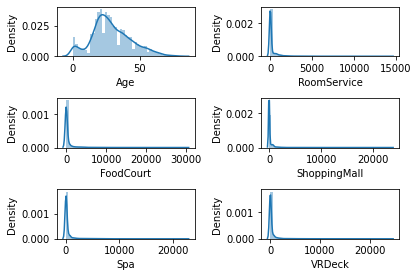

In [9]:
fig = plt.figure(figsize=(12, 6))

# create the figure and axes
n_rows = 3
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols)
axes = axes.ravel() # Return a contiguous flattened array.

for i in range(n_rows*n_cols):
  #sns.histplot(data=train_df[num_cols[i]], stat='density', kde=True, ax=axes[i]); 
  sns.distplot(train_df[num_cols[i]], ax=axes[i])
fig.tight_layout()
plt.show();

According to the distributions of the numerical features, as we have noticed before from the summary, the features associated with the luxury amenities have very skewed shape. Would this possible indicate that there are potential outliers (values towards the end of the tail which do not occur often are potential outliers)?

### 2.1.1 `Age`

In [10]:
train_df['Age'].describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

The average age of passengers is about 29 years old, and the 0-year-old to 79-year-old also boarded the *Spaceship Titanic*.

We will create a new variable, `Age_bin`, using `pandas.cut()` that segments and sort `Age` into bins. Binning is based on age categories provided [here](https://www.statcan.gc.ca/en/concepts/definitions/age2).

In [11]:
# Create `Age_bin`
train_df['Age_bin'] = pd.cut(train_df['Age'], bins=[0, 14, 24, 64, 79], labels=['Children', 'Youth', 'Adults', 'Seniors'])
train_df['Age_bin']

0       Adults
1        Youth
2       Adults
3       Adults
4        Youth
         ...  
8688    Adults
8689     Youth
8690    Adults
8691    Adults
8692    Adults
Name: Age_bin, Length: 8693, dtype: category
Categories (4, object): ['Children' < 'Youth' < 'Adults' < 'Seniors']

In [12]:
train_df['Age_bin'].value_counts(normalize=True)

Adults      0.570298
Youth       0.308061
Children    0.108805
Seniors     0.012836
Name: Age_bin, dtype: float64

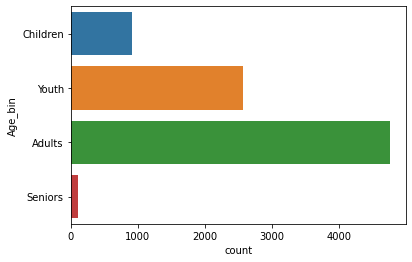

In [13]:
sns.countplot(y='Age_bin', data=train_df)

The count plot shows the counts of observations in each categorical bin of feature `Age_bin` using bars. We have four age categories, 'Children' (0 ~ 14 years), 'Youth' (15 ~ 24 years), 'Adults' (25 ~ 64 years) and 'Seniors' (65 years and over). More than half of the passengers are between 25 and 64 years old.

### 2.1.2 `Luxury`

The features, `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, and `VRDeck`, could be merged into one to form a new variable, `Luxury`. 

Then, as before, we use `pandas.cut()` to convert the new variable to groups of amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

In [14]:
train_df['Luxury'] = train_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
train_df.loc[:, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Luxury']].head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Luxury
0,0.0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0,736.0
2,43.0,3576.0,0.0,6715.0,49.0,10383.0
3,0.0,1283.0,371.0,3329.0,193.0,5176.0
4,303.0,70.0,151.0,565.0,2.0,1091.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


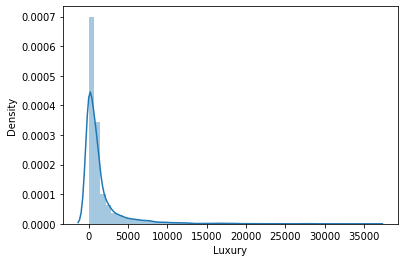

In [15]:
sns.distplot(train_df['Luxury'])

## 2.2 Categorical features

In our categorical bucket, we have `HomePlanet`, `CryoSleep`, `Destination`, `VIP`, and `Transported`. 

If we recall our objective, we can figure out that the column `Transported` is the one we are trying to predict.

To train a machine learning model, later we will need to convert these to numbers and we can use `.LabelEncoder()` function from the `sklearn` library.

In [16]:
# categorical columns
cat_cols = ['Transported', 'HomePlanet', 'CryoSleep', 'Destination', 'VIP']

train_df.loc[:, cat_cols].describe(exclude=np.number)

,Transported,HomePlanet,CryoSleep,Destination,VIP
count,8693,8492,8476,8511,8490
unique,2,3,2,3,2
top,True,Earth,False,TRAPPIST-1e,False
freq,4378,4602,5439,5915,8291


* There are some missing values in `HomePlanet`, `CryoSleep`, `Destination`, and `VIP`.
* The categorical features have two or three unique values.

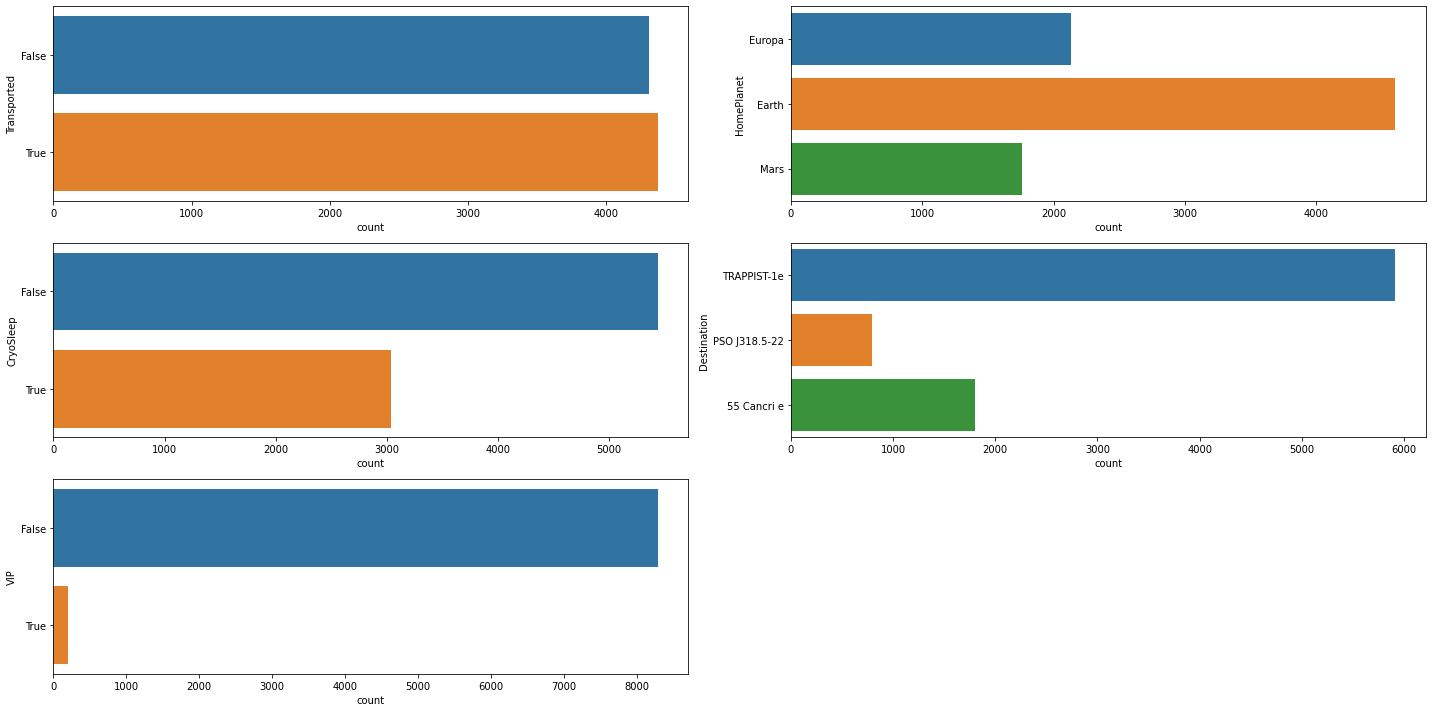

In [17]:
fig = plt.figure(figsize=(20, 10))
rows = 3
cols = 2

for i in range(rows*cols-1):
  fig.add_subplot(rows, cols, i+1)
  sns.countplot(y=cat_cols[i], data=train_df)

fig.tight_layout()
plt.show();

* The feature that we are trying to predict, `Transported`, seems balanced, meaning that the number of passengers who were transported to an alternate dimension and that of those who were not are approximately the same.
* Earth is the planet which more than half of the passengers departed from followed by Europa and Mars.
* The number of passengers who were elected to be put into suspended animation in their cabins for the duration of the voyage was almost half the number of passengers who were not.
* TRAPPIST-1e is the planet where most of the passenger were going to be debarking.
* Most of the passenger did not pay for special VIP service during the voyage.

## 2.3 Ambiguous features

In this bucket, we have `PassengerId`, `Cabin`, and `Name`.

According to the description Kaggle provides, `PassengerId` represents a unique Id for each passenger. Each Id takes the form `gggg_pp` where `gggg` indicates a group the passenger is travelling with and `pp` is their number within the group. People in a group are often family members, but not always. Then, we can create a new feature called `PassengerGroup` by extracting the first four characters from `PassengerId`.


`Cabin` is the cabin number where the passenger is staying. Takes the form `deck/num/side`, where `side` can be either `P` for *Port* or `S` for *Starboard*. As in the previous case, it is possible to create three new features out of this features, each representing the deck, number, and side, respectively. 


Finally, in terms of `Name` (the first and last names of the passenger), we will not worry about this feature to make a prediction because we do not think the name of a passenger would have influenced his/her chance of transporation.

### 2.3.1 `PassengerId`

In [18]:
train_df['PassengerGroup'] = train_df['PassengerId'].str.split('_').str[0]
print(f"There are {train_df['PassengerGroup'].nunique()} different groups.")

There are 6217 different groups.


We have created a feature called `PassengerGroup` from `PassengerId` which represents the group the passengers were travelling with. 

### 2.3.2 `Cabin`

In [19]:
train_df['CabinDeck'] = train_df['Cabin'].str.split('/').str[0]
train_df['CabinNum'] = train_df['Cabin'].str.split('/').str[1]
train_df['CabinSide'] = train_df['Cabin'].str.split('/').str[2]
train_df.loc[:, ['Cabin', 'CabinDeck', 'CabinNum', 'CabinSide']].head()

,Cabin,CabinDeck,CabinNum,CabinSide
0,B/0/P,B,0,P
1,F/0/S,F,0,S
2,A/0/S,A,0,S
3,A/0/S,A,0,S
4,F/1/S,F,1,S


In [20]:
print(f"There are {train_df['CabinDeck'].nunique()} different cabin decks.")
print(f"There are {train_df['CabinNum'].nunique()} different cabin numbers.")
print(f"There are {train_df['CabinSide'].nunique()} different cabin sides.")

There are 8 different cabin decks.
There are 1817 different cabin numbers.
There are 2 different cabin sides.


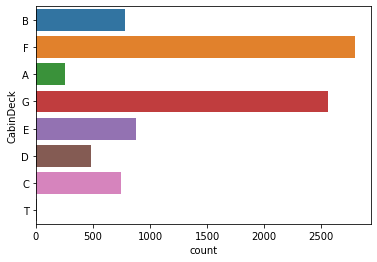

In [21]:
sns.countplot(y='CabinDeck', data=train_df);

In [22]:
train_df['CabinDeck'].value_counts(normalize=True)

F    0.328938
G    0.301271
E    0.103132
B    0.091712
C    0.087944
D    0.056275
A    0.030139
T    0.000589
Name: CabinDeck, dtype: float64

* Decks 'F' and 'G' were occupied by more than 60% of the passengers.
* Cabin deck 'T' had the fewest passengers.

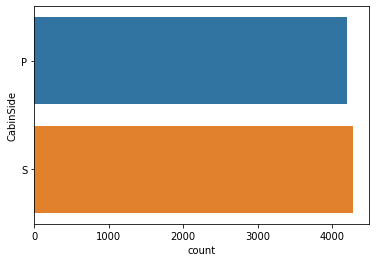

In [23]:
sns.countplot(y='CabinSide', data=train_df);

This feature `CabinSide` is balanced.

`CabinNum` doesn't seem to contain much information, so we won't look into it.


### 2.3.3 `Name`

I'm going to create a new column `LastName` from `Name` by extracting only the last name of the passengers.

In [24]:
train_df['Name']

0         Maham Ofracculy
1            Juanna Vines
2           Altark Susent
3            Solam Susent
4       Willy Santantines
              ...        
8688    Gravior Noxnuther
8689      Kurta Mondalley
8690         Fayey Connon
8691     Celeon Hontichre
8692     Propsh Hontichre
Name: Name, Length: 8693, dtype: object

In [25]:
train_df['LastName'] = train_df['Name'].str.split(' ').str[-1]
train_df.loc[:, ['Name', 'LastName']].head()

,Name,LastName
0,Maham Ofracculy,Ofracculy
1,Juanna Vines,Vines
2,Altark Susent,Susent
3,Solam Susent,Susent
4,Willy Santantines,Santantines


Now let's check whether the passengers who share the same last name belong to the same passenger group.

In [26]:
train_df.loc[:, ['Name', 'LastName', 'PassengerGroup']].head()

,Name,LastName,PassengerGroup
0,Maham Ofracculy,Ofracculy,0001
1,Juanna Vines,Vines,0002
2,Altark Susent,Susent,0003
3,Solam Susent,Susent,0003
4,Willy Santantines,Santantines,0004


In [27]:
train_df.groupby('LastName')['PassengerGroup'].nunique()

LastName
Acobson        2
Acobsond       3
Adavisons      5
Adkinson       3
Admingried     1
              ..
Wynneyerson    2
Yanton         5
Yatters        2
Yorkland       7
Youngrayes     3
Name: PassengerGroup, Length: 2217, dtype: int64

It can be seen that even if some passengers have the same last name, they are not in the same passenger group.

In [28]:
train_df.groupby('PassengerGroup')['LastName'].nunique()

PassengerGroup
0001    1
0002    1
0003    1
0004    1
0005    1
       ..
9275    1
9276    1
9278    1
9279    1
9280    1
Name: LastName, Length: 6217, dtype: int64

However, passengers in a group have the same last name. Based on this, we can fill in the missing values in feature `LastName` but this column would not help much predict the target variable.

# 3. Data Exploration - Bivariate

Until now, we analyzed all features individually. Let's now start combining some of these features together to obtain further insight into the interactions between them.

* Continuous vs. Continuous
* Continuous vs. Categorical
* Categorical vs. Categorical

## 3.1 Continuous features

In [29]:
num_cols.append('Luxury')
num_cols

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Luxury']

In [30]:
train_df.loc[:, num_cols].corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Luxury
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,0.186530
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,0.237998
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.745105
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.222310
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,0.596633
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,0.586299
Luxury,0.186530,0.237998,0.745105,0.222310,0.596633,0.586299,1.000000


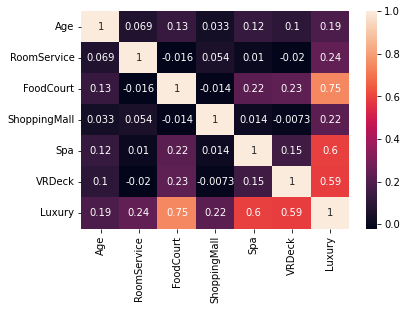

In [31]:
sns.heatmap(train_df.loc[:, num_cols].corr(), annot=True)

In [32]:
train_df.loc[:, ['Age', 'Luxury']].corr()

,Age,Luxury
Age,1.00000,0.18653
Luxury,0.18653,1.00000


In this dataset, we do not see any strong correlation between any two continuous variables, except `Luxury`, which is the sum of five features associated with luxury amenities.

The scatter plot belows show the relationship between `Age` and `Luxury` variables.

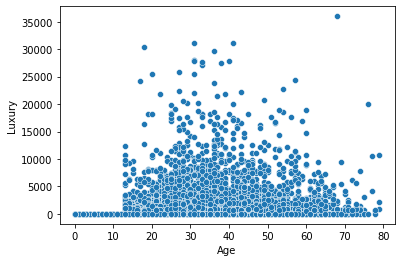

In [33]:
sns.scatterplot(data=train_df, x='Age', y='Luxury');

The points in the above scatter plot do not follow any specific pattern.

The passengers in age group 'Children' did not bill anything on the luxury amenities. This seems logicial as they would have been accompanied by their parents.

In [34]:
train_df.loc[train_df['Age'] < 13, ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=0)

Age             3640.0
RoomService        0.0
FoodCourt          0.0
ShoppingMall       0.0
Spa                0.0
VRDeck             0.0
dtype: float64

We confirm that the passengers under the age of 13 had no expenditure on the luxury amenities.

In [35]:
train_df.loc[train_df['Age'] < 13, ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].isna().sum()

Age              0
RoomService     20
FoodCourt       12
ShoppingMall    20
Spa             14
VRDeck          24
dtype: int64

We may be able to fill in the missing values for the luxury amenities that passengers under the age of 13 with zero.

In [36]:
train_df.loc[train_df['Age'] < 13, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = train_df.loc[train_df['Age'] < 13, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)
train_df.loc[train_df['Age'] < 13, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].isna().sum()

RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [37]:
luxury_zero = (train_df['RoomService'] == 0) & (train_df['ShoppingMall'] == 0) & (train_df['FoodCourt'] == 0) & (train_df['Spa'] == 0) & (train_df['VRDeck'] == 0)

train_df.loc[luxury_zero, 'Age']

0       39.0
9       14.0
18      45.0
19       0.0
21       1.0
        ... 
8680    31.0
8681    33.0
8684    23.0
8685     0.0
8689    18.0
Name: Age, Length: 3334, dtype: float64

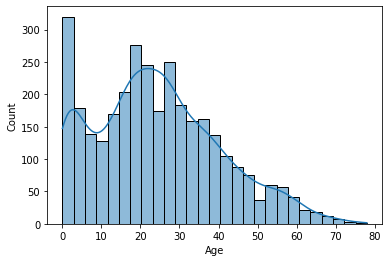

In [38]:
sns.histplot(data=train_df.loc[luxury_zero], x='Age', kde=True)

Looking at the age distribution of passengers who spent no money on luxury amenities, it can be seen that the distribution is not limited to 0 to 13 years old. Therefore, we should be careful when filling up the missing age cases among them with different values.

In [39]:
train_df.loc[train_df['Luxury'] == 0, ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
7,28.0,0.0,0.0,0.0,0.0,NaN
9,14.0,0.0,0.0,0.0,0.0,0.0
10,34.0,0.0,0.0,NaN,0.0,0.0
18,45.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
8680,31.0,0.0,0.0,0.0,0.0,0.0
8681,33.0,0.0,0.0,0.0,0.0,0.0
8684,23.0,0.0,0.0,0.0,0.0,0.0
8685,0.0,0.0,0.0,0.0,0.0,0.0


Because the correlations among the five luxury amenities are weak, we also have to be careful when dealing with missing values in the features associated with the luxury amenities even if the others are not missing.

## 3.2 Categorical vs. Continuous features

Now we will try to see how values of continuous variables behave for different values of categorical variables.

In [40]:
cat_cols.remove('Transported')
cat_cols.extend(['PassengerGroup', 'CabinDeck', 'CabinSide', 'Age_bin'])
cat_cols

['HomePlanet',
 'CryoSleep',
 'Destination',
 'VIP',
 'PassengerGroup',
 'CabinDeck',
 'CabinSide',
 'Age_bin']

### 3.2.1 `Transported`
We will first see the relationship between `Transported` column and the continuous variables.

In [41]:
train_df.groupby('Transported').agg('mean')[num_cols]

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Luxury
Transported,,,,,,,
False,29.922858,388.528994,382.525520,167.407574,563.982016,542.474256,2004.149247
True,27.748834,62.922220,531.326107,179.157710,61.517683,68.906636,885.689127


In the above table, we can see that the avarage bills spent on the luxury amenities of the passengers who did not get transported to the alternate dimension are more than those who were.

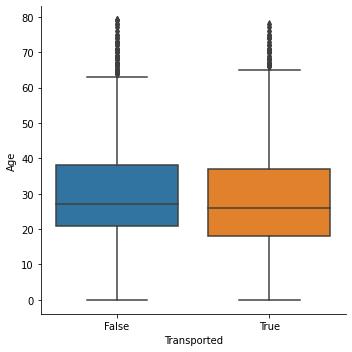

In [42]:
sns.catplot(data=train_df, x='Transported', y='Age', kind='box')

The box plot above indicates that the distributions of `Age` column grouped by the target variable, `Transported` look similar. 

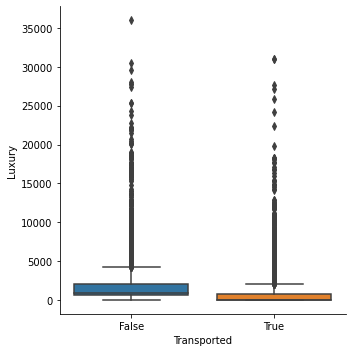

In [43]:
sns.catplot(data=train_df, x='Transported', y='Luxury', kind='box')

### 3.2.2 `HomePlanet`

In [44]:
train_df.groupby('HomePlanet').agg('mean')[num_cols]

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Luxury
HomePlanet,,,,,,,
Earth,26.068232,136.485157,137.137533,133.456483,142.496897,137.581504,673.337462
Europa,34.419664,145.162691,1501.053161,151.060125,847.649257,874.096282,3451.624589
Mars,29.297203,551.616676,54.173133,307.731326,109.966416,47.385598,1051.256964


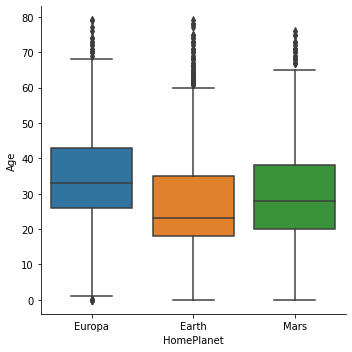

In [45]:
sns.catplot(data=train_df, x='HomePlanet', y='Age', kind='box')

The passengers from Europa are on average older than those who from Earth and Mars. 

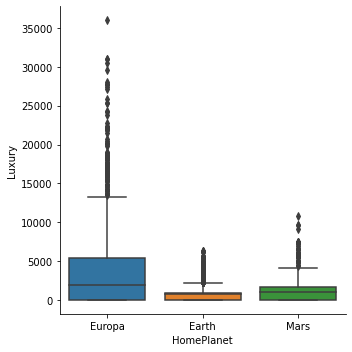

In [46]:
sns.catplot(data=train_df, x='HomePlanet', y='Luxury', kind='box')

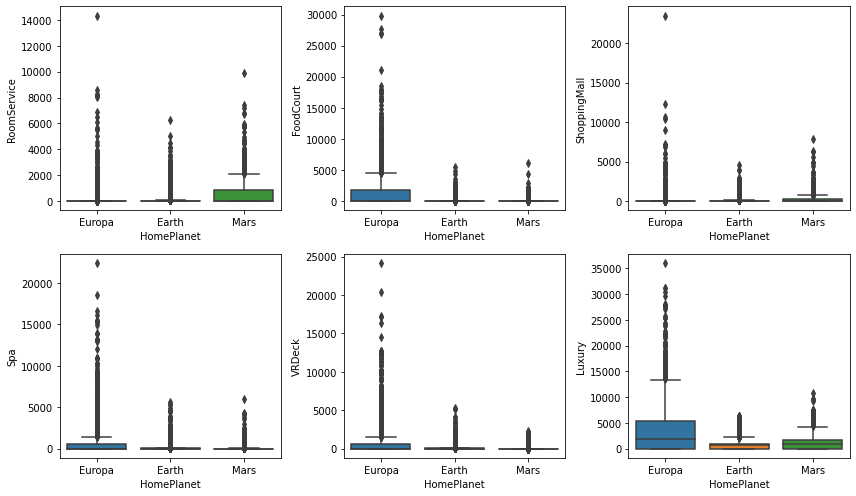

In [47]:
luxuries = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Luxury']

fig = plt.figure(figsize=(12, 7))
nrows = 2
ncols = 3

for i in range(nrows*ncols):
  fig.add_subplot(nrows, ncols, i+1)
  sns.boxplot(data=train_df, x='HomePlanet', y=luxuries[i])

fig.tight_layout()
plt.show();

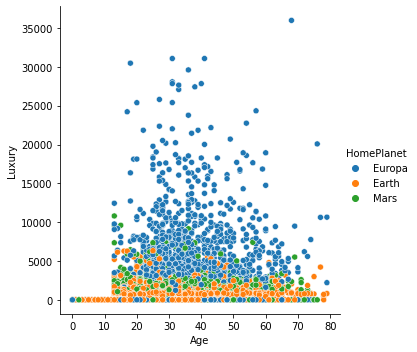

In [48]:
sns.relplot(data=train_df, x='Age', y='Luxury', hue='HomePlanet')

On average, the passengers from Europa have billed more at the luxury amenities than those who departed from the other two planets. This may be due to a higher average age of people from Europa and these people may have more to spare. However, we have seen that the correlation between `Age` and `Luxury` was lower than 0.2, which can be considered as negligible.

### 3.2.3 `CryoSleep`

In [49]:
train_df.groupby('CryoSleep').agg('mean')[num_cols]

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Luxury
CryoSleep,,,,,,,
False,29.651319,349.752906,712.202437,270.181359,485.819291,474.28973,2248.299687
True,27.405415,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


* The passengers in cryosleep have zero spending on the luxury amentieis, which is a matter of course. We can use this information to fill in the missing values in those columns.

In [50]:
train_df.loc[train_df['CryoSleep'] == True, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].isna().sum()

RoomService     54
FoodCourt       65
ShoppingMall    85
Spa             55
VRDeck          57
dtype: int64

In [51]:
train_df.loc[train_df['CryoSleep'] == True, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = train_df.loc[train_df['CryoSleep'] == True, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)
train_df.loc[train_df['CryoSleep'] == True, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].isna().sum()

RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

How about the other way around? Were passengers who didn't spend any money on luxury amenities in cold sleep?

In [52]:
train_df.loc[luxury_zero, 'CryoSleep'].value_counts()

True     2734
False     507
Name: CryoSleep, dtype: int64

It turns out to be no, there were people not in cryosleep who used none of the luxury amenities.

### 3.2.4 `Destination`

In [53]:
train_df.groupby('Destination').agg('mean')[num_cols]

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Luxury
Destination,,,,,,,
55 Cancri e,29.305776,191.306443,879.610112,155.569257,474.734007,503.124789,2180.285556
PSO J318.5-22,27.529412,89.219822,121.100381,111.705957,117.100509,139.598475,572.315327
TRAPPIST-1e,28.817522,250.955940,372.634372,185.314457,281.936728,265.132214,1338.339983


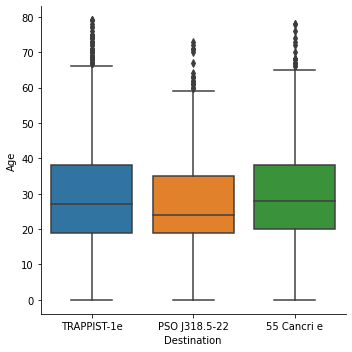

In [54]:
sns.catplot(data=train_df, x='Destination', y='Age', kind='box')

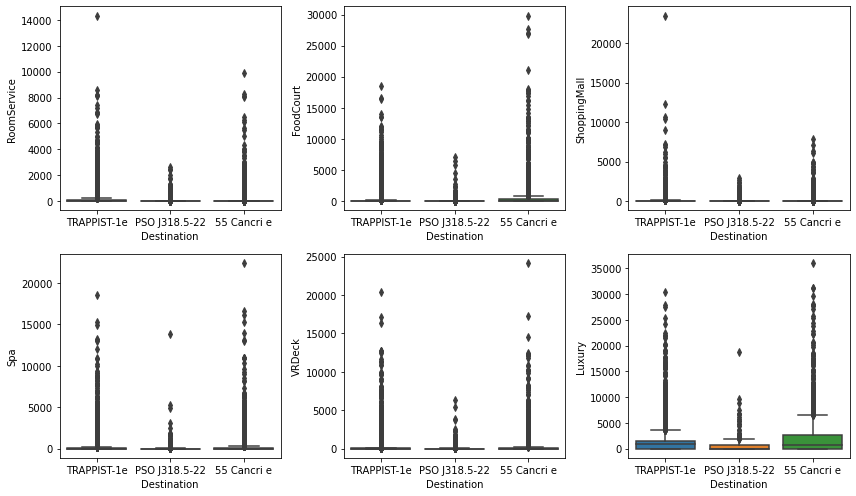

In [55]:
fig = plt.figure(figsize=(12, 7))
nrows = 2
ncols = 3

for i in range(nrows*ncols):
  fig.add_subplot(nrows, ncols, i+1)
  sns.boxplot(data=train_df, x='Destination', y=luxuries[i])

fig.tight_layout()
plt.show();

There is nothing unusual about the relationship between these two variables.

### 3.2.5 `VIP`

In [56]:
train_df.groupby('VIP')[num_cols].agg('mean')

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Luxury
VIP,,,,,,,
False,28.639611,215.308913,422.485352,171.669961,299.239516,279.989984,1371.504644
True,37.449495,473.615385,1802.056701,247.726804,756.868687,1228.556122,4425.477387


* The average age of passengers who paid for special VIP services during the voyage was about nine years higher than those who did not.
* They also spent more on the luxury amenities, which makes sense. 

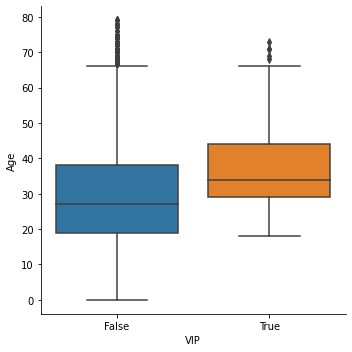

In [57]:
sns.catplot(data=train_df, x='VIP', y='Age', kind='box');

In [58]:
train_df.groupby('VIP')['Age'].agg('min')

VIP
False     0.0
True     18.0
Name: Age, dtype: float64

Passengers under the age of 18 do not appear to have paid for VIP services because they probably couldn't have afforded it. This will help fill in the missing values.

In [59]:
train_df.loc[train_df['Age'] < 18, 'VIP'].isna().sum(), train_df.loc[train_df['Age'] >= 18, 'VIP'].isna().sum()

(45, 152)

There are 45 and 152 missing observations in feature `VIP` for passengers under the age of 18 and over, respectively.

In [60]:
train_df.loc[train_df['Age'] < 18, 'VIP'] = train_df.loc[train_df['Age'] < 18, 'VIP'].fillna(False)
train_df.loc[train_df['Age'] >= 18, 'VIP'] = train_df.loc[train_df['Age'] >= 18, 'VIP'].fillna(True)
train_df['VIP'].isna().sum()

6

We are still left with 6 missing values because of missing age as seen below.

In [61]:
train_df.loc[train_df['VIP'].isna()==True, ['Age', 'VIP']]

,Age,VIP
566,NaN,NaN
1001,NaN,NaN
1705,NaN,NaN
3882,NaN,NaN
4253,NaN,NaN
5086,NaN,NaN


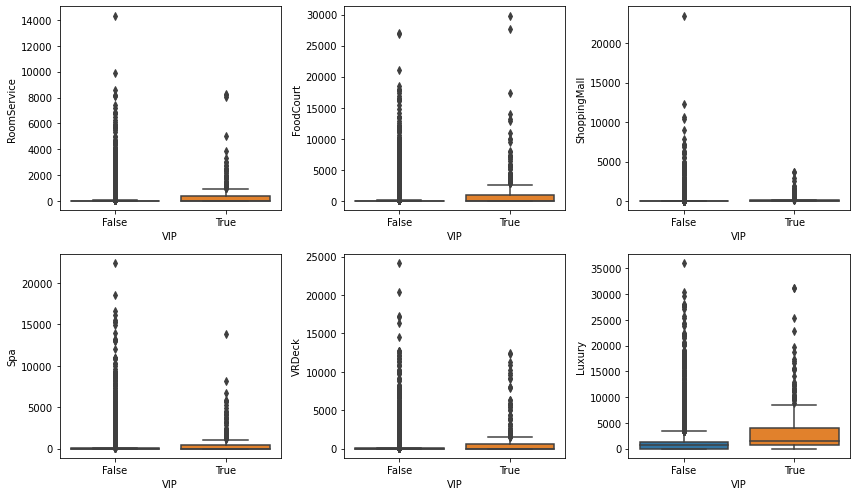

In [62]:
fig = plt.figure(figsize=(12, 7))
nrows = 2
ncols = 3

for i in range(nrows*ncols):
  fig.add_subplot(nrows, ncols, i+1)
  sns.boxplot(data=train_df, x='VIP', y=luxuries[i])

fig.tight_layout()
plt.show();

### 3.2.6 `CabinDeck`

In [63]:
train_df.groupby('CabinDeck')[num_cols].agg('mean')

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Luxury
CabinDeck,,,,,,,
A,35.161943,134.616601,1541.539062,113.156627,693.250000,931.692913,3402.304688
B,33.622715,84.474227,1243.344072,150.435233,720.946891,743.485199,2927.833119
C,34.886145,179.943166,1815.339674,172.960811,916.425474,1074.060893,4105.906292
D,33.518201,672.684435,587.731501,309.360169,470.677350,286.404255,2289.520921
E,30.068925,310.952546,265.792388,229.158382,270.378347,240.906250,1298.772831
F,28.430495,307.356025,144.948634,238.288679,164.073117,145.164843,982.766285
G,24.062775,72.087539,78.878010,69.549174,88.785320,75.100827,381.035170
T,37.000000,427.200000,1397.400000,0.500000,2008.400000,883.000000,4716.400000


* Passengers in cabin deck 'G' were on average younger. They also spent the least money on the luxury amenities.

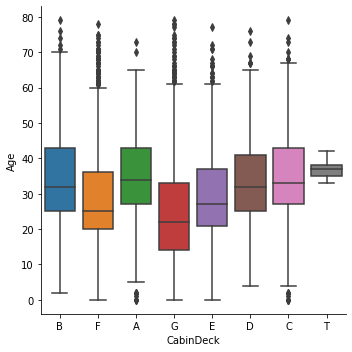

In [64]:
sns.catplot(data=train_df, x='CabinDeck', y='Age', kind='box')

In [65]:
train_df.groupby('CabinDeck')['Age'].agg(['count', 'min'])

,count,min
CabinDeck,,
A,247,0.0
B,766,2.0
C,729,0.0
D,467,4.0
E,856,0.0
F,2748,0.0
G,2501,0.0
T,5,33.0


Why the passengers in cabin deck 'T' are on average older than the others?

Let's check whether they are in the same passenger group.

In [66]:
train_df.loc[train_df['CabinDeck']=='T', ['Cabin', 'CabinDeck', 'CabinNum', 'CabinSide', 'PassengerGroup']]

,Cabin,CabinDeck,CabinNum,CabinSide,PassengerGroup
1004,T/0/P,T,0,P,1071
2254,T/1/P,T,1,P,2414
2734,T/2/P,T,2,P,2935
2763,T/3/P,T,3,P,2971
4565,T/2/S,T,2,S,4863


They do not belong to the same group, meaning that they are not related.

In [67]:
train_df.loc[(train_df['PassengerGroup']=='1071') | (train_df['PassengerGroup']=='2414') | (train_df['PassengerGroup']=='2935') | (train_df['PassengerGroup']=='2971') | (train_df['PassengerGroup']=='4863'), ]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,Age_bin,Luxury,PassengerGroup,CabinDeck,CabinNum,CabinSide,LastName
1004,1071_01,NaN,False,T/0/P,TRAPPIST-1e,35.0,False,415.0,1328.0,0.0,...,60.0,Alraida Dingauge,False,Adults,1817.0,1071,T,0,P,Dingauge
2254,2414_01,Europa,False,T/1/P,TRAPPIST-1e,42.0,False,0.0,1829.0,2.0,...,2447.0,Mergak Headfair,False,Adults,7411.0,2414,T,1,P,Headfair
2734,2935_01,Europa,False,T/2/P,TRAPPIST-1e,33.0,False,0.0,28.0,0.0,...,543.0,NaN,False,Adults,7412.0,2935,T,2,P,NaN
2763,2971_01,Europa,False,T/3/P,TRAPPIST-1e,38.0,False,0.0,3135.0,0.0,...,3.0,Pent Sessiouse,True,Adults,3164.0,2971,T,3,P,Sessiouse
4565,4863_01,Europa,NaN,T/2/S,TRAPPIST-1e,37.0,False,1721.0,667.0,NaN,...,1362.0,Phacton Unsible,False,Adults,3778.0,4863,T,2,S,Unsible


Furthermore, they were travelling alone. 

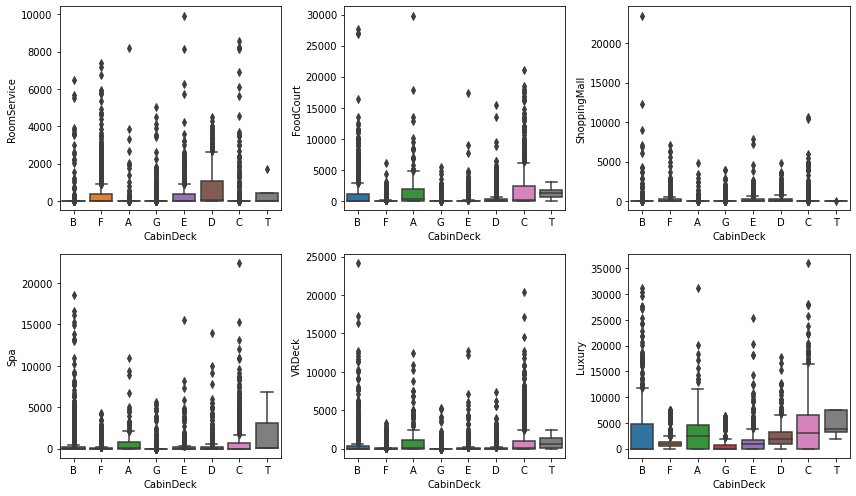

In [68]:
fig = plt.figure(figsize=(12, 7))
nrows = 2
ncols = 3

for i in range(nrows*ncols):
  fig.add_subplot(nrows, ncols, i+1)
  sns.boxplot(data=train_df, x='CabinDeck', y=luxuries[i])

fig.tight_layout()
plt.show();

### 3.2.7 `CabinSide`

In [69]:
train_df.groupby('CabinSide')[num_cols].agg('mean')

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Luxury
CabinSide,,,,,,,
P,28.650339,228.086610,421.102046,185.057377,301.982892,312.926060,1430.150737
S,28.987604,212.200283,486.068933,160.334669,306.246514,293.697735,1441.298041


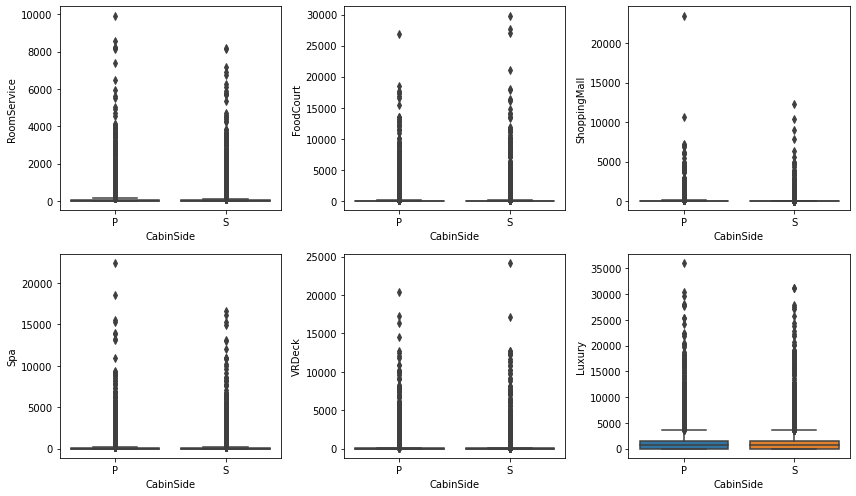

In [70]:
fig = plt.figure(figsize=(12, 7))
nrows = 2
ncols = 3

for i in range(nrows*ncols):
  fig.add_subplot(nrows, ncols, i+1)
  sns.boxplot(data=train_df, x='CabinSide', y=luxuries[i])

fig.tight_layout()
plt.show();

We do not observe any relationships between `CabinSide` and the continuous variables.

## 3.3 Categorical vs. Categorical features

Lastly, we will see whether there exists a relationship between two categorical variables. We first drop `PassengerGroup` as it has too many levels to look into.

In [71]:
cat_cols.remove('PassengerGroup')
cat_cols

['HomePlanet',
 'CryoSleep',
 'Destination',
 'VIP',
 'CabinDeck',
 'CabinSide',
 'Age_bin']

### 3.3.1 `Transported`

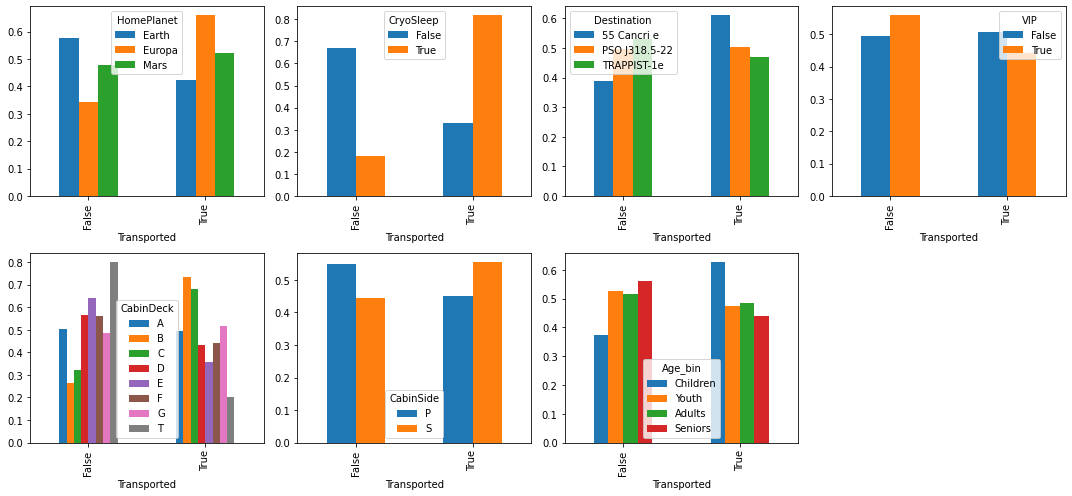

In [72]:
nrows = 2
ncols = 4
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 7))
fig.delaxes(axes[nrows-1, ncols-1])

for i in range(nrows*ncols-1):
  if i < 4:
    x, y = 0, i
  else:
    x, y = 1, i-4
  #train_df.groupby('Transported')[cat_cols[i]].value_counts(normalize=True).unstack(0).plot(ax=axes[x, y], kind='bar')
  train_df.groupby(cat_cols[i])['Transported'].value_counts(normalize=True).unstack(0).plot(ax=axes[x, y], kind='bar')

fig.tight_layout()
plt.show();

* By looking at the above plots, it seems that `Destination`, `VIP`, and `Age_bin` are not considered to be useful to predict `Transported`.
* 
* `CabinDeck` and `CabinSide` might help predict the dependent variable. 
* The passengers who got transported were more likely to be in cryosleep.

### 3.3.2 `HomePlanet`

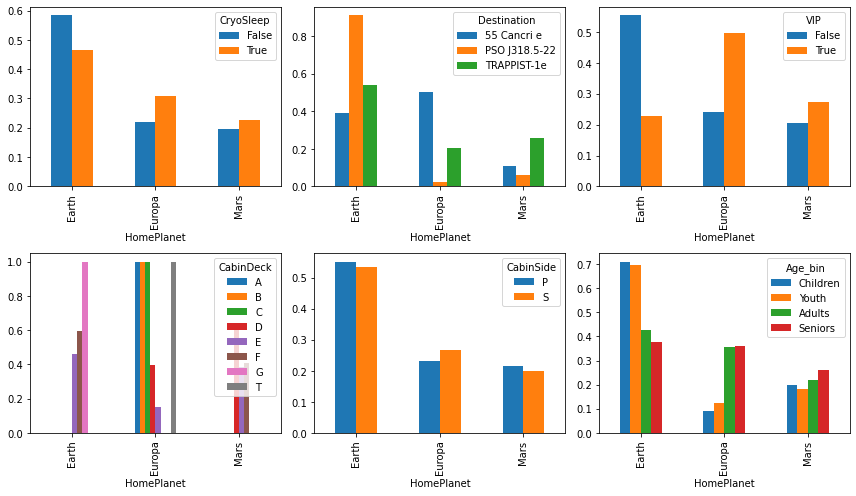

In [73]:
cat_cols_no_homeplanet = cat_cols[:]
cat_cols_no_homeplanet.remove('HomePlanet')
nrows = 2
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 7))

for i in range(nrows*ncols):
  if i < 3:
    x, y = 0, i
  else:
    x, y = 1, i-3
  #train_df.groupby('HomePlanet')[cat_cols_no_homeplanet[i]].value_counts(normalize=True).unstack(0).plot(ax=axes[x, y], kind='bar')
  train_df.groupby(cat_cols_no_homeplanet[i])['HomePlanet'].value_counts(normalize=True).unstack(0).plot(ax=axes[x, y], kind='bar')

fig.tight_layout()
plt.show();

* PSO J318.5-22 was not a popular destination for people coming from Earth and Mars.
* More than half of the passengers who did not pay for the VIP service were from Earth whereas within those who had VIP service, almost half of them were coming from Europa.
* Most of the passengers staying in cabin decks 'A', 'B', 'C', and 'T' were from Europa while people in deck 'D' were coming from Mars and 'Europa'. 
   - Would staying in the decks 'A', 'B', and 'C' have been more expensive than the other decks? We would never know as we do not have any information about ticket price.
* Passengers in cabin deck 'G' were mostly from Earth and in decks 'E' and 'F' either from Earth or Mars.
* No relationship seems to exist between `HomePlanet` and `CabinSide`.
* Many passengers under the age of 24 were coming from Earth.
  - This might help explain the relationship between `HomePlanet` and `VIP`.
* We do not see any particular pattern between `HomePlanet` and `CryoSleep`.

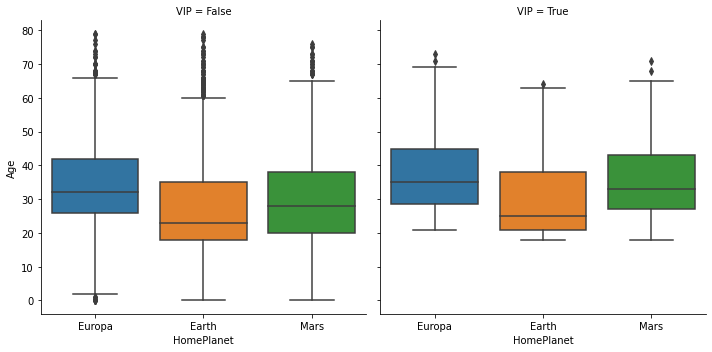

In [74]:
sns.catplot(data=train_df, x="HomePlanet", y="Age", kind="box", col="VIP")

Actually, we do not see much difference of the age distribution in the three countries when the passengers are grouped by feature `VIP`. Therefore, we can conclude that `Age` does not help explain the relationshop between `HomePlanet` and `VIP`.

### 3.3.3 `CryoSleep`

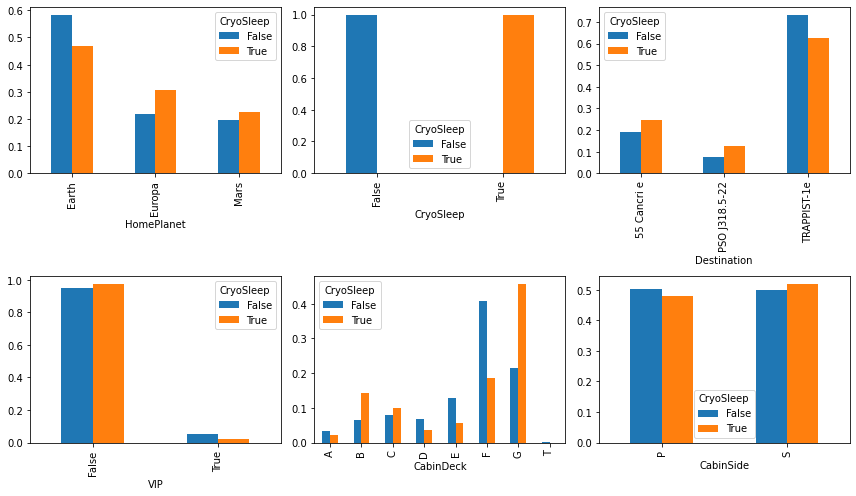

In [85]:
cat_cols_no_cryosleep = cat_cols[:]
cat_cols_no_cryosleep.remove('CryoSleep')
nrows = 2
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 7))

for i in range(nrows*ncols):
  if i < 3:
    x, y = 0, i
  else:
    x, y = 1, i-3
  train_df.groupby('CryoSleep')[cat_cols[i]].value_counts(normalize=True).unstack(0).plot(ax=axes[x, y], kind='bar')

fig.tight_layout()
plt.show();

* The passengers in cabin deck 'G' were likely to be put into cryosleep and the opposite is true for those who were staying in deck 'F'.

### 3.3.4 `Destination`

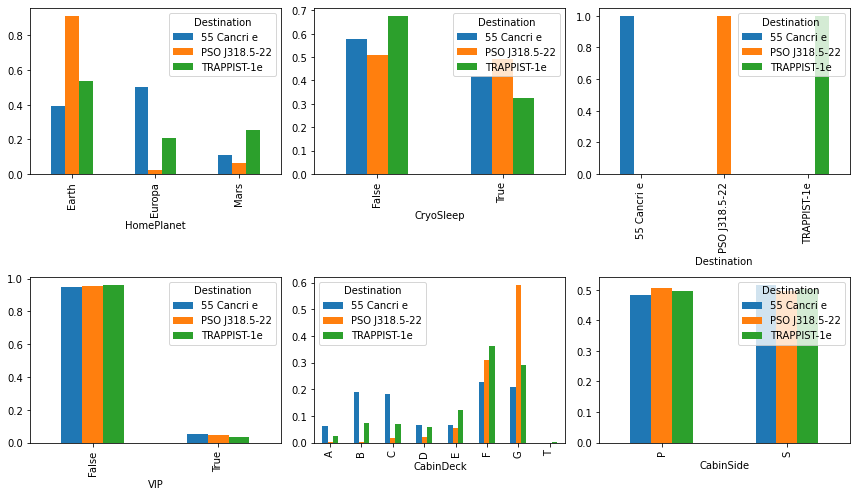

In [86]:
cat_cols_no_cryosleep = cat_cols[:]
cat_cols_no_cryosleep.remove('Destination')
nrows = 2
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 7))

for i in range(nrows*ncols):
  if i < 3:
    x, y = 0, i
  else:
    x, y = 1, i-3
  train_df.groupby('Destination')[cat_cols[i]].value_counts(normalize=True).unstack(0).plot(ax=axes[x, y], kind='bar')

fig.tight_layout()
plt.show();

* About 90 percent of the passengers who were heading to PSO J318.5-22 came from Earth.
* No relationship between `CabinSide` and `Destination` is either observed.

In [100]:
train_df.loc[train_df['Destination']=='PSO J318.5-22', 'HomePlanet'].isna().sum()

16

In [101]:
train_df.loc[train_df['Destination']=='PSO J318.5-22', 'HomePlanet'] = train_df.loc[train_df['Destination']=='PSO J318.5-22', 'HomePlanet'].fillna('Earth')

### 3.3.5 `VIP`

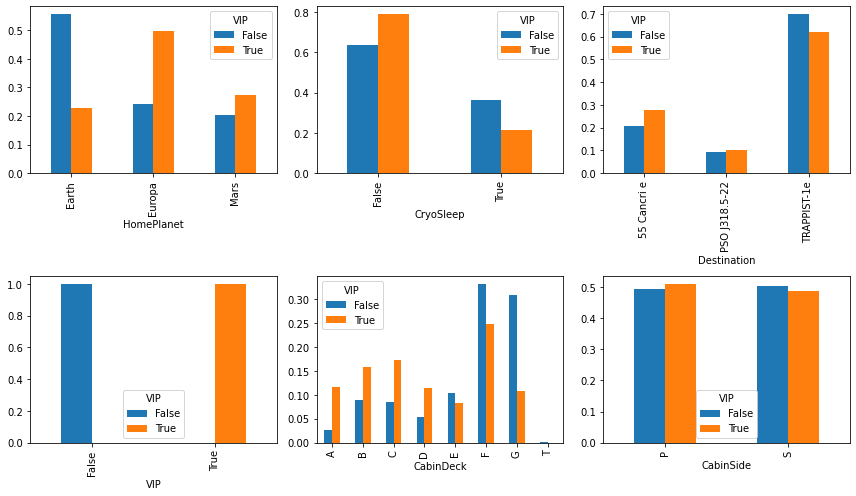

In [94]:
cat_cols_no_cryosleep = cat_cols[:]
cat_cols_no_cryosleep.remove('VIP')
nrows = 2
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 7))

for i in range(nrows*ncols):
  if i < 3:
    x, y = 0, i
  else:
    x, y = 1, i-3
  train_df.groupby('VIP')[cat_cols[i]].value_counts(normalize=True).unstack(0).plot(ax=axes[x, y], kind='bar')

fig.tight_layout()
plt.show();

* Among the passengers who paid for the VIP service, there were more people who were not in cryosleep. However, the same was true for non VIP passengers although the proportion was less unbalanced.
  - We can use this to fill in the missing values for `CryoSleep`.

In [95]:
train_df.loc[train_df['VIP']==True, 'CryoSleep'].isna().sum()

7

In [98]:
train_df.loc[train_df['VIP']==True, 'CryoSleep'] = train_df.loc[train_df['VIP']==True, 'CryoSleep'].fillna(False)

### 3.3.6 `Age_bin`

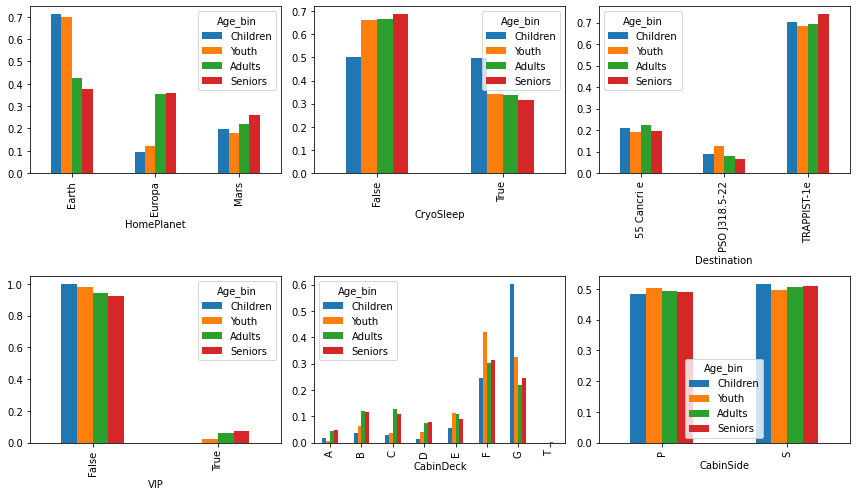

In [103]:
cat_cols_no_cryosleep = cat_cols[:]
cat_cols_no_cryosleep.remove('Age_bin')
nrows = 2
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 7))

for i in range(nrows*ncols):
  if i < 3:
    x, y = 0, i
  else:
    x, y = 1, i-3
  train_df.groupby('Age_bin')[cat_cols[i]].value_counts(normalize=True).unstack(0).plot(ax=axes[x, y], kind='bar')

fig.tight_layout()
plt.show();

* Around 70 percent of the passengers who are under age of 24 came from Earth.

In [110]:
train_df.loc[(train_df['Age_bin']=='Children') | (train_df['Age_bin']=='Youth'), 'HomePlanet'].isna().sum()

73

In [111]:
train_df.loc[(train_df['Age_bin']=='Children') | (train_df['Age_bin']=='Youth'), 'HomePlanet'] = train_df.loc[(train_df['Age_bin']=='Children') | (train_df['Age_bin']=='Youth'), 'HomePlanet'].fillna('Earth')

# 4. Missingness

We will be using the missingno library to check out missing values in the data left to be filled in. It detects where `NaN` values (or no values) appear and highlights them. White lines indicate missing values.

Before that, we are going to drop some columns that seem unnecessary for imputation.

In [113]:
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Age_bin', 'Luxury', 'PassengerGroup',
       'CabinDeck', 'CabinNum', 'CabinSide', 'LastName'],
      dtype='object')

In [114]:
train_df.drop(labels=['PassengerId', 'Cabin', 'Luxury', 'Name'], axis=1, inplace=True)
train_df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Age_bin',
       'PassengerGroup', 'CabinDeck', 'CabinNum', 'CabinSide', 'LastName'],
      dtype='object')

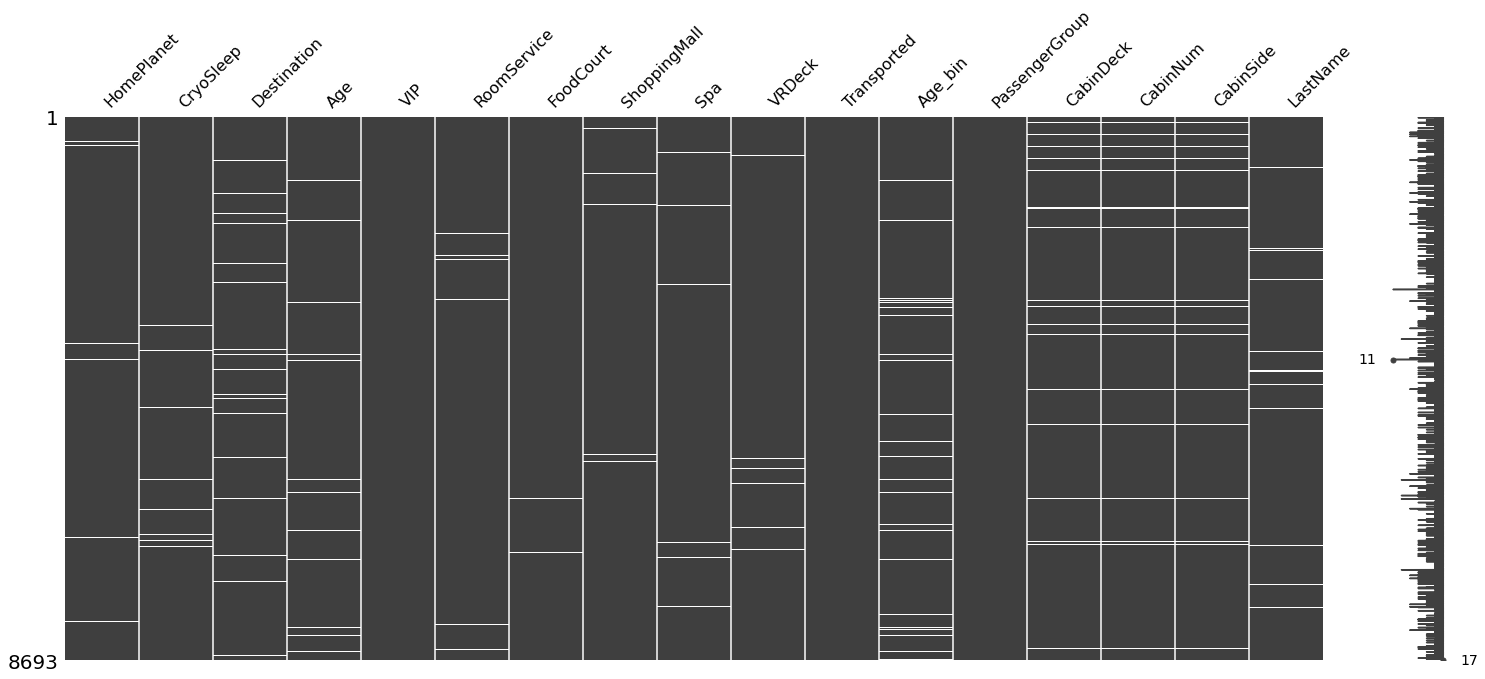

In [115]:
missingno.matrix(train_df)

In [116]:
train_df.isna().sum()

HomePlanet        112
CryoSleep         210
Destination       182
Age               179
VIP                 6
RoomService       107
FoodCourt         106
ShoppingMall      103
Spa               114
VRDeck            107
Transported         0
Age_bin           357
PassengerGroup      0
CabinDeck         199
CabinNum          199
CabinSide         199
LastName          200
dtype: int64

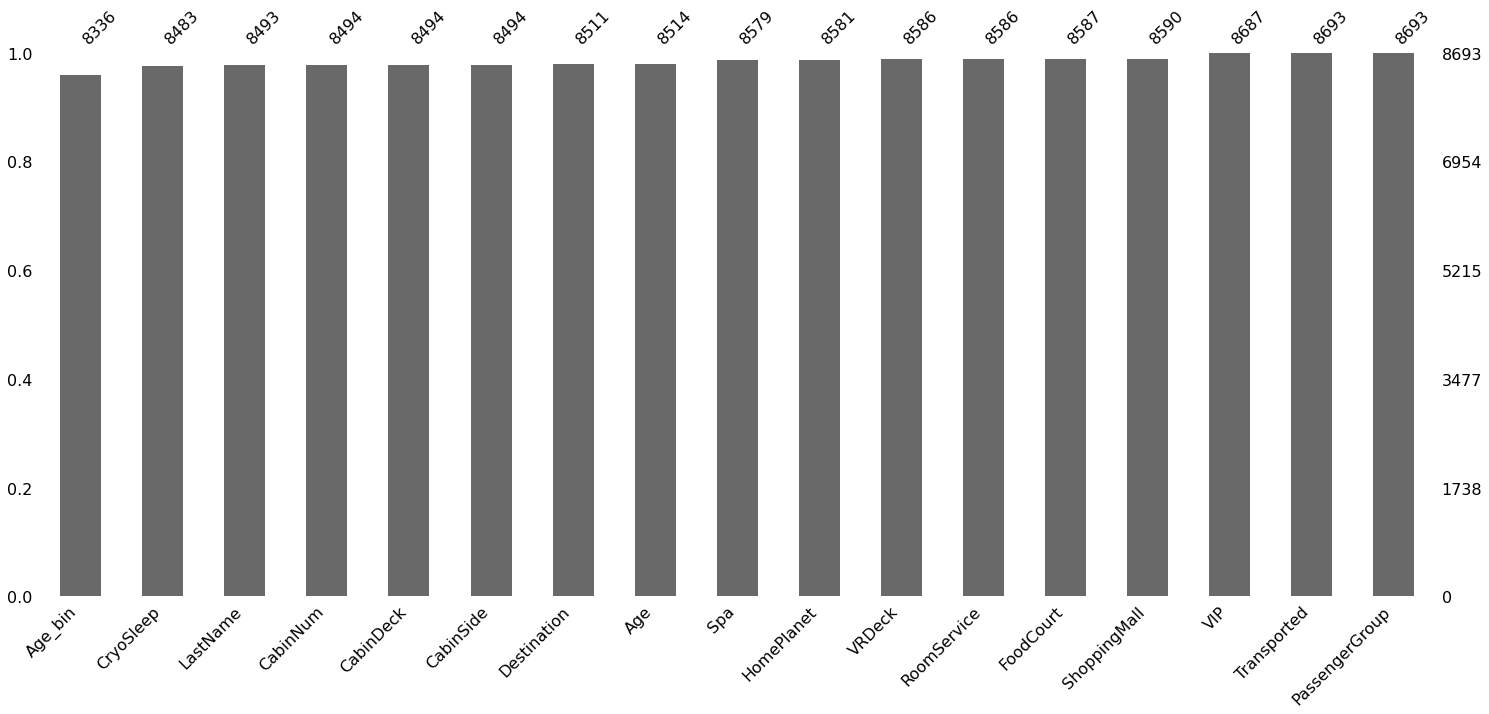

In [117]:
missingno.bar(train_df, sort='ascending')

All features except `PassengerId` and `Transported` have a fair amount of missing values. 

To deal with the missingness, we will fill them with other values. For imputation, we will be using KNN ($K$-Nearest Neighbors), which is widely used.

One thing to note here is that the KNN Imputer does not recognize text data values. It will generate errors if we do not change these values to numerical values. Therefore, we first have to perform encoding to modify the categocial features in the data.

We are going to first change the data type of `PassengerGroup` to numeric.

In [119]:
train_df['PassengerGroup'] = pd.to_numeric(train_df['PassengerGroup'])

Then, using `LabelEncider()` from `sklearn.preprocessing` we will encode the columns.

In [121]:
le = LabelEncoder()

train_df_to_encode = train_df.loc[:, ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported', 'Age_bin', 'CabinDeck', 'CabinSide', 'LastName']]
train_df_to_encode = train_df_to_encode.apply(lambda series: pd.Series(LabelEncoder().fit_transform(series[series.notnull()]), index=series[series.notnull()].index))
train_df.loc[:, ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported', 'Age_bin', 'CabinDeck', 'CabinSide', 'LastName']] = train_df_to_encode

Another point to keep in mind is that the KNN Imptuer is a distance-based imputation method. Thus, the data should be normalized because otherwise, the different scales of our data will lead the Imputer to produce biased replacements for the missing values. For simplicity, we will use Scikit-Learn's `MinMaxScaler` which will scale our variables to have values between 0 and 1.

In [122]:
scaler = MinMaxScaler()
train_df_scale = pd.DataFrame(scaler.fit_transform(train_df), columns = train_df.columns)
train_df_scale.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Age_bin,PassengerGroup,CabinDeck,CabinNum,CabinSide,LastName
0,0.5,0.0,1.0,0.493671,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.142857,0.000000,0.0,0.645758
1,0.0,0.0,1.0,0.303797,0.0,0.007608,0.000302,0.001064,0.024500,0.001823,1.0,1.0,0.000108,0.714286,0.000000,1.0,0.951715
2,0.5,0.0,1.0,0.734177,1.0,0.003001,0.119948,0.000000,0.299670,0.002030,0.0,0.0,0.000216,0.000000,0.000000,1.0,0.898014
3,0.5,0.0,1.0,0.417722,0.0,0.000000,0.043035,0.015793,0.148563,0.007997,0.0,0.0,0.000216,0.000000,0.000000,1.0,0.898014
4,0.0,0.0,1.0,0.202532,0.0,0.021149,0.002348,0.006428,0.025214,0.000083,1.0,1.0,0.000323,0.714286,0.000528,1.0,0.802347


Finally, we impute the data using `KNNImputer()`. The number of neighbors (`n_neighbors` argument) is set to 5 even if other values are also possible.

In [123]:
imputer = KNNImputer(n_neighbors=5)
train_df_imputed = pd.DataFrame(imputer.fit_transform(train_df), columns = train_df.columns)
train_df_imputed

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Age_bin,PassengerGroup,CabinDeck,CabinNum,CabinSide,LastName
0,1.0,0.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1431.0
1,0.0,0.0,2.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,3.0,2.0,5.0,0.0,1.0,2109.0
2,1.0,0.0,2.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0,0.0,3.0,0.0,0.0,1.0,1990.0
3,1.0,0.0,2.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0,0.0,3.0,0.0,0.0,1.0,1990.0
4,0.0,0.0,2.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,3.0,4.0,5.0,1.0,1.0,1778.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1.0,0.0,0.0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,0.0,0.0,9276.0,0.0,98.0,0.0,1416.0
8689,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,9278.0,6.0,1499.0,1.0,1341.0
8690,0.0,0.0,2.0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,1.0,0.0,9279.0,6.0,1500.0,1.0,470.0
8691,1.0,0.0,0.0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,0.0,0.0,9280.0,4.0,608.0,1.0,996.0


As you can see below, all the missing values are gone!

In [124]:
train_df_imputed.isna().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Age_bin           0
PassengerGroup    0
CabinDeck         0
CabinNum          0
CabinSide         0
LastName          0
dtype: int64